## 1. 데이터 불러오기

In [2]:
# 1) 데이터 불러오기
import pandas as pd
from pathlib import Path

# === CSV 경로 설정 ===
DATA_PATH = Path("titanic_train.csv") # 현재 폴더에 있을 때
# DATA_PATH = Path(r"C:\Users\joara\Downloads\titanic_train.csv") # 파일 탐색기 경로를 사용할 때 (우클릭 -> 경로로 복사 하여 "" 안에 넣기)
 
# 파일 존재 확인
if not DATA_PATH.exists():
    raise FileNotFoundError(f"파일을 찾을 수 없습니다: {DATA_PATH.resolve()}")

# 읽어오기
df = pd.read_csv(DATA_PATH)

---

## 2. 데이터 살펴보기

In [3]:
# 2) 데이터 살펴보기 (기본 EDA)
import numpy as np
import matplotlib.pyplot as plt

print("- shape :", df.shape)                 # 데이터프레임의 행(row), 열(column) 수 확인
print("- columns :", df.columns.tolist())    # 전체 컬럼 이름 리스트 출력

- shape : (891, 12)
- columns : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### 📑 컬럼 설명

1. **PassengerId**

   * 승객 고유 번호 (단순 인덱스 역할)
   * 분석에는 크게 의미가 없음.

2. **Survived**

   * 생존 여부 (타깃 값, 0 = 사망, 1 = 생존)

3. **Pclass**

   * 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
   * 사회적 지위나 요금 수준을 반영함.

4. **Name**

   * 승객 이름 (호칭, 가족 관계, 신분 등 파생 변수를 만들 때 활용 가능)

5. **Sex**

   * 성별 (`male`, `female`)

6. **Age**

   * 나이 (결측치 존재, 평균·중앙값 등으로 채우거나 그룹별 처리 필요)

7. **SibSp**

   * **Siblings/Spouses Aboard**
   * 함께 탑승한 형제자매, 배우자의 수

8. **Parch**

   * **Parents/Children Aboard**
   * 함께 탑승한 부모님, 자녀의 수

9. **Ticket**

   * 티켓 번호 (그 자체는 큰 의미 없으나, 같은 티켓 번호 → 그룹 단위 탑승 여부를 알 수 있음)

10. **Fare**

    * 요금 (탑승권 가격, Pclass와 관련 있음)

11. **Cabin**

    * 객실 번호 (결측치 많음. 알파벳으로 구역 정보를 뽑아낼 수 있음)

12. **Embarked**

    * 탑승 항구 (`C = Cherbourg`, `Q = Queenstown`, `S = Southampton`)


In [4]:
df.head() # 앞쪽 5행의 데이터 미리보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()   
# DataFrame 전체 구조 요약 출력
# - Index 범위 (행 개수) : 몇 개의 데이터가 있는지
# - 각 컬럼 이름과 순서
# - Non-Null Count : 결측치가 아닌 값의 개수 (→ 결측치 파악에 유용)
# - Dtype : 각 컬럼의 데이터 타입 (int, float, object 등)
# - 메모리 사용량 : 데이터프레임이 차지하는 메모리 크기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("[결측치 요약]")

# 각 컬럼별 결측치 개수를 구하고 정리
missing = (
    df.isna()                               # 각 셀마다 결측치면 True, 아니면 False 반환
      .sum()                                # 컬럼별로 True 개수 합산 → 컬럼별 결측치 개수
      .rename("missing_num")                # 결과 Series 이름을 "missing_num"으로 바꿔줌
      .to_frame()                           # Series → DataFrame으로 변환 (컬럼명 : missing_num)
)

# 결측치 비율(%) 컬럼 추가
missing["missing_pct"] = (missing["missing_num"] / len(df) * 100).round(2)
# - len(df) : 전체 행 개수
# - 결측치 개수를 전체 개수로 나눔 → 비율
# - *100 : 퍼센트로 변환
# - round(2): 소수점 둘째 자리까지 반올림

# 결측치 개수가 많은 순으로 정렬해서 출력
print(missing.sort_values("missing_num", ascending=False))


[결측치 요약]
             missing_num  missing_pct
Cabin                687        77.10
Age                  177        19.87
Embarked               2         0.22
PassengerId            0         0.00
Name                   0         0.00
Pclass                 0         0.00
Survived               0         0.00
Sex                    0         0.00
Parch                  0         0.00
SibSp                  0         0.00
Fare                   0         0.00
Ticket                 0         0.00


In [7]:
print("[중복 확인]")

# 전체 데이터에서 완전히 같은 행(중복 행)의 개수 확인
print("- 전체 중복 행 수 :", df.duplicated().sum())

# 특정 컬럼(PassengerId)에 대해, 그 안에서 중복된 값이 몇 개인지 확인
if "PassengerId" in df.columns:
    print("- PassengerId 중복 수 :", df["PassengerId"].duplicated().sum())
if "Age" in df.columns:
    print("- Age 중복 수 :", df["Age"].duplicated().sum())

print("\n[고유값 개수]")

# 각 컬럼별 고유값 개수를 세고, 많은 순서대로 정렬
print(df.nunique().sort_values(ascending=False))
# - nunique() : 고유값(unique) 개수 세기
# - sort_values() : 값 기준으로 정렬
#   (ascending=False → 큰 값부터 내림차순 정렬)

[중복 확인]
- 전체 중복 행 수 : 0
- PassengerId 중복 수 : 0
- Age 중복 수 : 802

[고유값 개수]
PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Embarked         3
Pclass           3
Survived         2
Sex              2
dtype: int64


In [8]:
# 숫자/범주형 컬럼 자동 분리
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\n- 수치형 컬럼 :", num_cols)
print("- 범주형 컬럼 :", cat_cols)


- 수치형 컬럼 : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
- 범주형 컬럼 : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
print("[수치형 요약 통계]")
df[num_cols].describe()

# df.describe()만 해도 자동으로 수치형에 대한 요약 통계만 제공

# DataFrame의 수치형 컬럼 요약 통계 제공 
# - count : 결측치를 제외한 값의 개수
# - mean : 평균
# - std : 표준편차 (데이터 흩어진 정도)
# - min : 최소값
# - 25% : 1사분위수 (하위 25% 지점)
# - 50% : 중앙값(중위수)
# - 75% : 3사분위수 (상위 25% 지점)
# - max : 최대값

[수치형 요약 통계]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print("[범주형 요약 통계]")
df[cat_cols].describe()

# df.describe(include=["object"])도 같은 결과를 제공

# DataFrame의 범주형 컬럼 요약 통계 제공 
# - count : 결측치를 제외한 값의 개수
# - unique : 서로 다른 값(고유값)의 개수
# - top : 가장 많이 등장한 값 (최빈값)
# - freq : 최빈값이 등장한 횟수
#
# → 숫자가 아닌 문자열 데이터의 분포를 빠르게 파악할 때 유용

[범주형 요약 통계]


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


[타깃 분포]

[클래스 개수]
Survived
0    549
1    342
Name: count, dtype: int64

[클래스 비율]
Survived
0    0.616
1    0.384
Name: proportion, dtype: float64


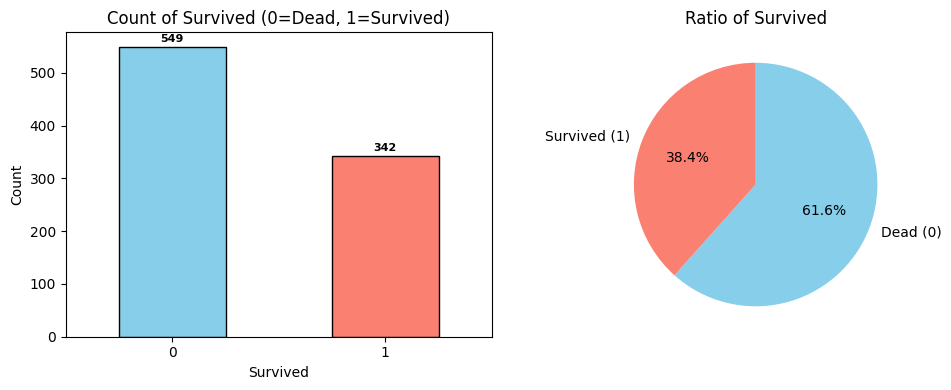

In [18]:
import matplotlib.pyplot as plt

print("[타깃 분포]")

# 타깃 컬럼("Survived")이 데이터프레임에 존재할 때만 실행
if "Survived" in df.columns:
    print("\n[클래스 개수]")
    # value_counts(dropna=False): 각 클래스별 개수 세기 (결측치도 포함 가능)
    print(df["Survived"].value_counts(dropna=False))

    print("\n[클래스 비율]")
    # value_counts(normalize=True): 전체 대비 비율 계산 (합계=1)
    # round(3): 소수점 셋째 자리까지 반올림
    print(df["Survived"].value_counts(normalize=True).round(3))

    # ==== subplot 생성 (1행 2열: 왼쪽=막대, 오른쪽=파이) ====
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 가로 10, 세로 4 크기의 캔버스

    # --- (1) 막대그래프: 절대 개수 ---
    # "Survived" 컬럼의 값 개수 세기 (0=사망, 1=생존)
    counts = df["Survived"].value_counts()

    # 막대그래프(bar chart)로 시각화
    counts.plot(
        kind="bar",                 # 막대그래프(bar chart)로 그림
        color=["skyblue", "salmon"],# 클래스별 색상 (0=파랑, 1=빨강)
        edgecolor="black",          # 막대 테두리를 검은색으로 표시
        ax=axes[0]                  # subplot(왼쪽 axes)에 그리기
    )

    axes[0].set_title("Count of Survived (0=Dead, 1=Survived)")  # 제목
    axes[0].set_xlabel("Survived")   # x축 라벨
    axes[0].set_ylabel("Count")      # y축 라벨
    axes[0].set_xticklabels(["0", "1"], rotation=0)  # x축 라벨 수평 표시
    
    # 막대 위에 개수 라벨 표시
    for i, v in enumerate(counts):
        axes[0].text(i, v + 5, str(v), ha="center", va="bottom", fontsize=8, fontweight="bold")
        # i: 막대 위치, v: 값
        # v+10 → 막대 위쪽에 여유 공간 두고 표시
        # ha="center": 가로 가운데 정렬
        # va="bottom": 텍스트를 막대 위에 붙여서 표시
    

    # --- (2) 파이차트: 비율 ---
    df["Survived"].value_counts(normalize=True).plot(
        kind="pie", 
        labels=["Dead (0)", "Survived (1)"], 
        autopct="%.1f%%",            # 퍼센트 표시
        colors=["skyblue", "salmon"], 
        startangle=90,               # 12시 방향부터 시작
        counterclock=False,          # 시계 방향
        ax=axes[1]                   # 오른쪽 subplot에 그림
    )
    axes[1].set_title("Ratio of Survived")  # 제목
    axes[1].set_ylabel("")                  # 불필요한 y축 라벨 제거

    # 그래프 간격 조정
    plt.tight_layout()
    plt.show()


[범주형 분포]

- Pclass 분포:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

- Sex 분포:
Sex
male      577
female    314
Name: count, dtype: int64

- Embarked 분포:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


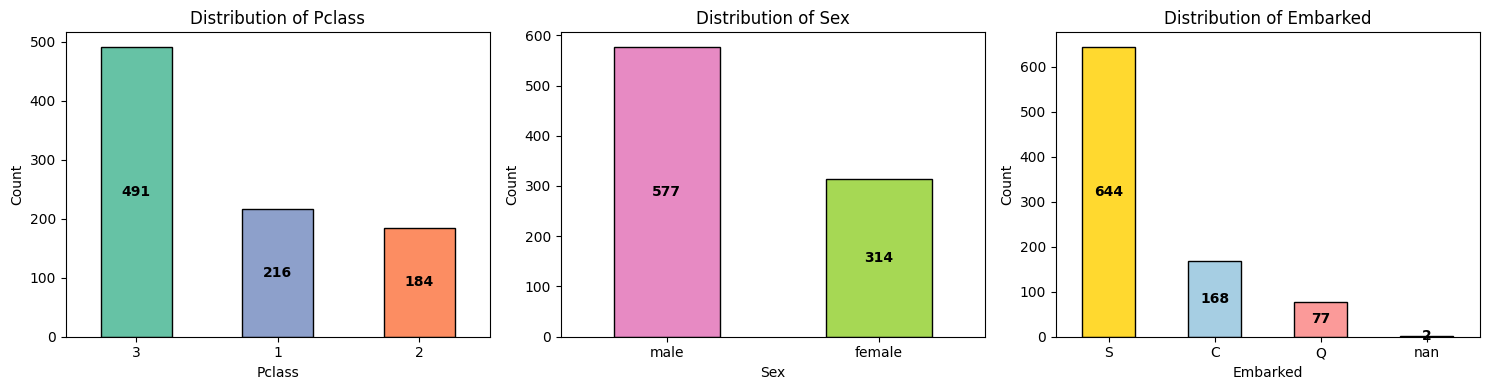

In [23]:
import matplotlib.pyplot as plt

print("[범주형 분포]")

# 분석할 범주형 컬럼
cat_cols = [c for c in ["Pclass", "Sex", "Embarked"] if c in df.columns]

# 컬럼별 색상 팔레트 지정
color_palettes = {
    "Pclass": ["#66c2a5", "#8da0cb", "#fc8d62"],   # 파스텔톤 (청록, 보라, 주황)
    "Sex":    ["#e78ac3", "#a6d854"],              # 핑크, 연두
    "Embarked": ["#ffd92f", "#a6cee3", "#fb9a99"]  # 노랑, 하늘, 연분홍
}

# subplot (1행 3열)
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 4))

for i, c in enumerate(cat_cols):
    print(f"\n- {c} 분포:")

    # 각 카테고리별 개수 계산 (결측치 포함, 상위 10개만)
    counts = df[c].value_counts(dropna=False).head(10)
    print(counts)

    # 색상 팔레트 선택 (카테고리 개수만큼 색상 잘라오기)
    colors = color_palettes.get(c, ["skyblue"] * len(counts))[:len(counts)]

    # 막대그래프 그리기
    counts.plot(
        kind="bar", 
        color=colors, 
        edgecolor="black",
        ax=axes[i]
    )

    axes[i].set_title(f"Distribution of {c}")
    axes[i].set_xlabel(c)
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(counts.index.astype(str), rotation=0)

    # 각 막대 중앙에 숫자 라벨 표시
    for j, v in enumerate(counts):
        axes[i].text(j, v/2, str(v), ha="center", va="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


In [13]:
print("\n[교차표: 성별별 생존율]")

# "Sex"와 "Survived" 컬럼이 모두 있으면 실행
if set(["Sex","Survived"]).issubset(df.columns):
    # pd.crosstab: 교차표(빈도표) 생성
    # index="Sex", columns="Survived" → 행: 성별, 열: 생존 여부
    # normalize="index" → 각 행을 기준으로 비율 계산 (즉, 성별별 생존율)
    # round(3) → 소수점 셋째 자리까지 반올림
    print(pd.crosstab(df["Sex"], df["Survived"], normalize="index").round(3))


print("\n[교차표: 선실등급별 생존율]")
# "Pclass"와 "Survived" 컬럼이 모두 있으면 실행
if set(["Pclass","Survived"]).issubset(df.columns):
    # 행: Pclass(선실 등급), 열: Survived(생존 여부)
    # normalize="index" → 등급별 생존율 계산
    print(pd.crosstab(df["Pclass"], df["Survived"], normalize="index").round(3))


[교차표: 성별별 생존율]
Survived      0      1
Sex                   
female    0.258  0.742
male      0.811  0.189

[교차표: 선실등급별 생존율]
Survived      0      1
Pclass                
1         0.370  0.630
2         0.527  0.473
3         0.758  0.242


In [14]:
# 간단한 집계 예시

# "Pclass"와 "Survived" 컬럼이 모두 존재할 때 실행
if set(["Pclass","Survived"]).issubset(df.columns):
    print("\n- Pclass별 평균 생존율")
    # groupby("Pclass"): 선실 등급별로 그룹화
    # ["Survived"].mean(): 각 그룹에서 생존률(평균값) 계산
    # round(3): 소수점 셋째 자리까지 반올림
    print(df.groupby("Pclass")["Survived"].mean().round(3))

# "Sex"와 "Survived" 컬럼이 모두 존재할 때 실행
if set(["Sex","Survived"]).issubset(df.columns):
    print("\n- Sex별 평균 생존율")
    # 성별별 평균 생존율 계산
    print(df.groupby("Sex")["Survived"].mean().round(3))

# "Embarked"와 "Survived" 컬럼이 모두 존재할 때 실행
if set(["Embarked","Survived"]).issubset(df.columns):
    print("\n- Embarked별 평균 생존율")
    # 탑승 항구별 평균 생존율 계산
    print(df.groupby("Embarked")["Survived"].mean().round(3))


- Pclass별 평균 생존율
Pclass
1    0.630
2    0.473
3    0.242
Name: Survived, dtype: float64

- Sex별 평균 생존율
Sex
female    0.742
male      0.189
Name: Survived, dtype: float64

- Embarked별 평균 생존율
Embarked
C    0.554
Q    0.390
S    0.337
Name: Survived, dtype: float64


In [15]:
# 상관관계(수치형만)
print("\n[수치형 상관관계]")

# 분석에 사용할 주요 수치형 컬럼만 골라서 리스트 생성
# 실제 데이터프레임에 존재하는 컬럼만 선택
corr_cols = [c for c in ["Survived","Pclass","Age","SibSp","Parch","Fare"] if c in df.columns]

# 선택한 컬럼들 간의 상관계수(correlation) 계산
# - corr(): 피어슨 상관계수(기본값) 계산
# - numeric_only=True: 숫자형 데이터만 대상으로 계산
corr = df[corr_cols].corr(numeric_only=True)

# 상관계수 소수점 셋째 자리까지 반올림해서 보기 좋게 출력
corr.round(3)


[수치형 상관관계]


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.257,-0.549,0.096,0.160,0.216,1.000


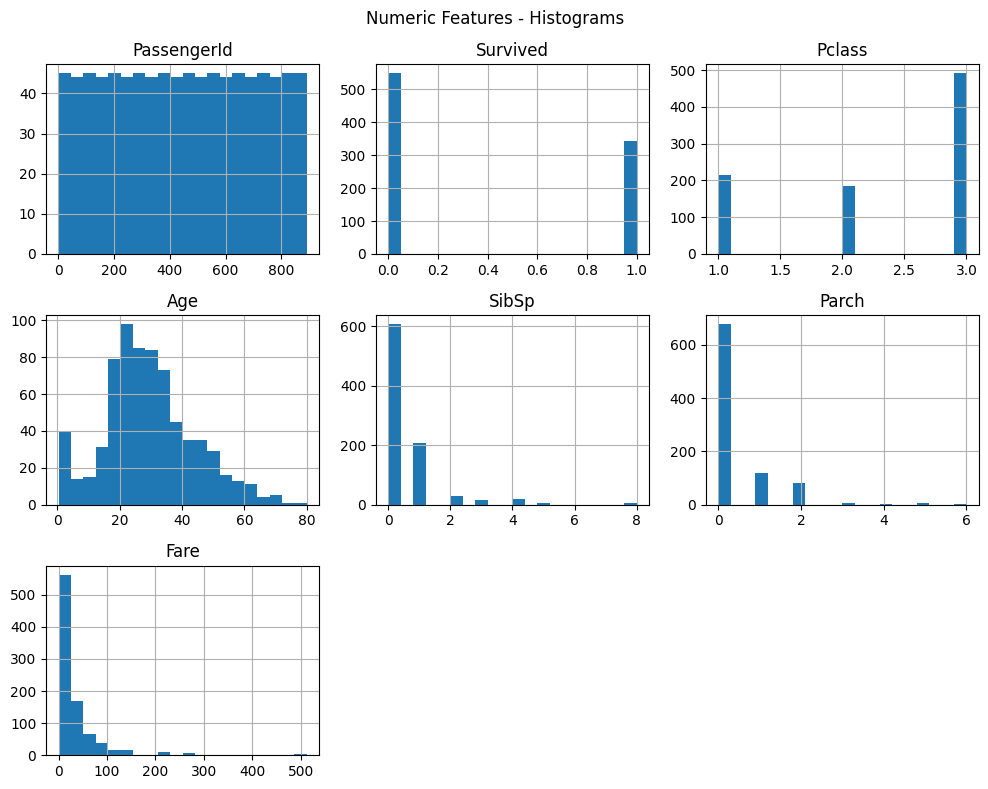

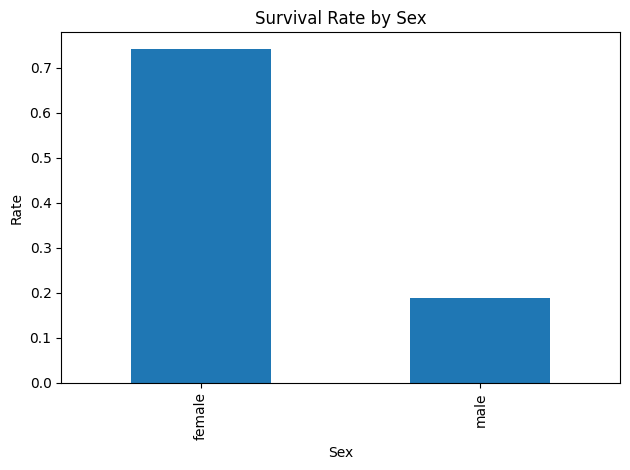

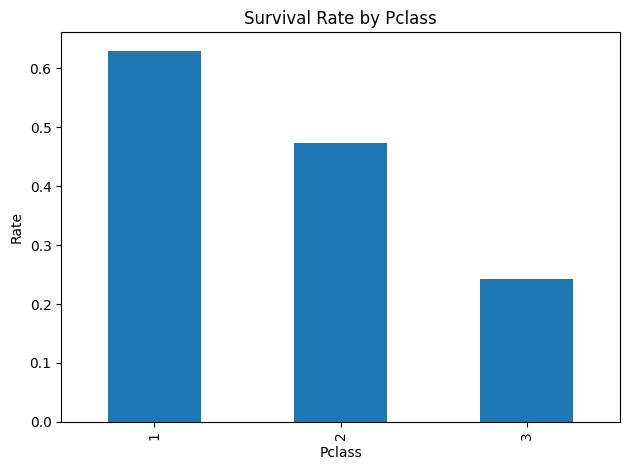

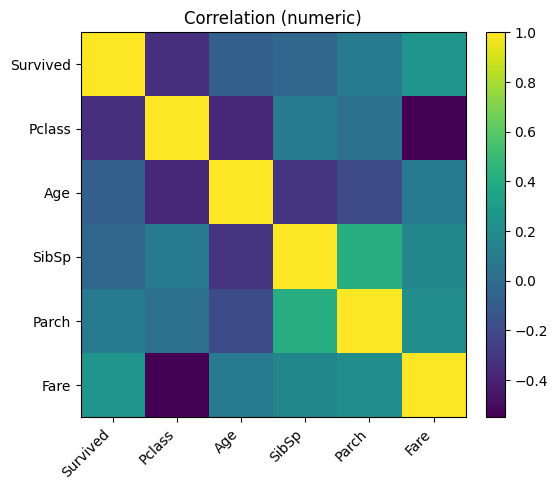

In [16]:

# ===== 간단 시각화 =====
# 1) 수치형 분포 히스토그램
if len(num_cols) > 0:
    df[num_cols].hist(bins=20, figsize=(10, 8))
    plt.suptitle("Numeric Features - Histograms")
    plt.tight_layout()
    plt.show()

# 2) 성별/등급별 생존율 바 차트
if set(["Sex","Survived"]).issubset(df.columns):
    df.groupby("Sex")["Survived"].mean().plot(kind="bar")
    plt.title("Survival Rate by Sex")
    plt.ylabel("Rate")
    plt.tight_layout()
    plt.show()

if set(["Pclass","Survived"]).issubset(df.columns):
    df.groupby("Pclass")["Survived"].mean().plot(kind="bar")
    plt.title("Survival Rate by Pclass")
    plt.ylabel("Rate")
    plt.tight_layout()
    plt.show()

# 3) 상관관계 히트맵(간단 matplotlib)
if corr.shape[0] > 1:
    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation (numeric)")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()
